**UE 4268 - Examen 2023**

**`Noms et prenoms`**, `matricule` et `email` 

Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

In [148]:
from IPython.display import Image

In [149]:
# Display Qiskit Software and System information
import qiskit.tools.jupyter
%qiskit_version_table

# Algorithme de la VQE

**Cet exercice se traite exclusivement sur la feuille de composition**

L'algorithme du VQE (Variationnal Quantum Eigensolver) se résume en deux grandes parties qu'illustre la figure ci-dessous.
 
1. Expliquer pourquoi on dit que c'est un **algorithme hybride** en indiquant ce que fait chaque processeur. 
2. Qu'est-ce que la profondeur d'un circuit quantique et quelle son influence dans les algorithmes du VQE?

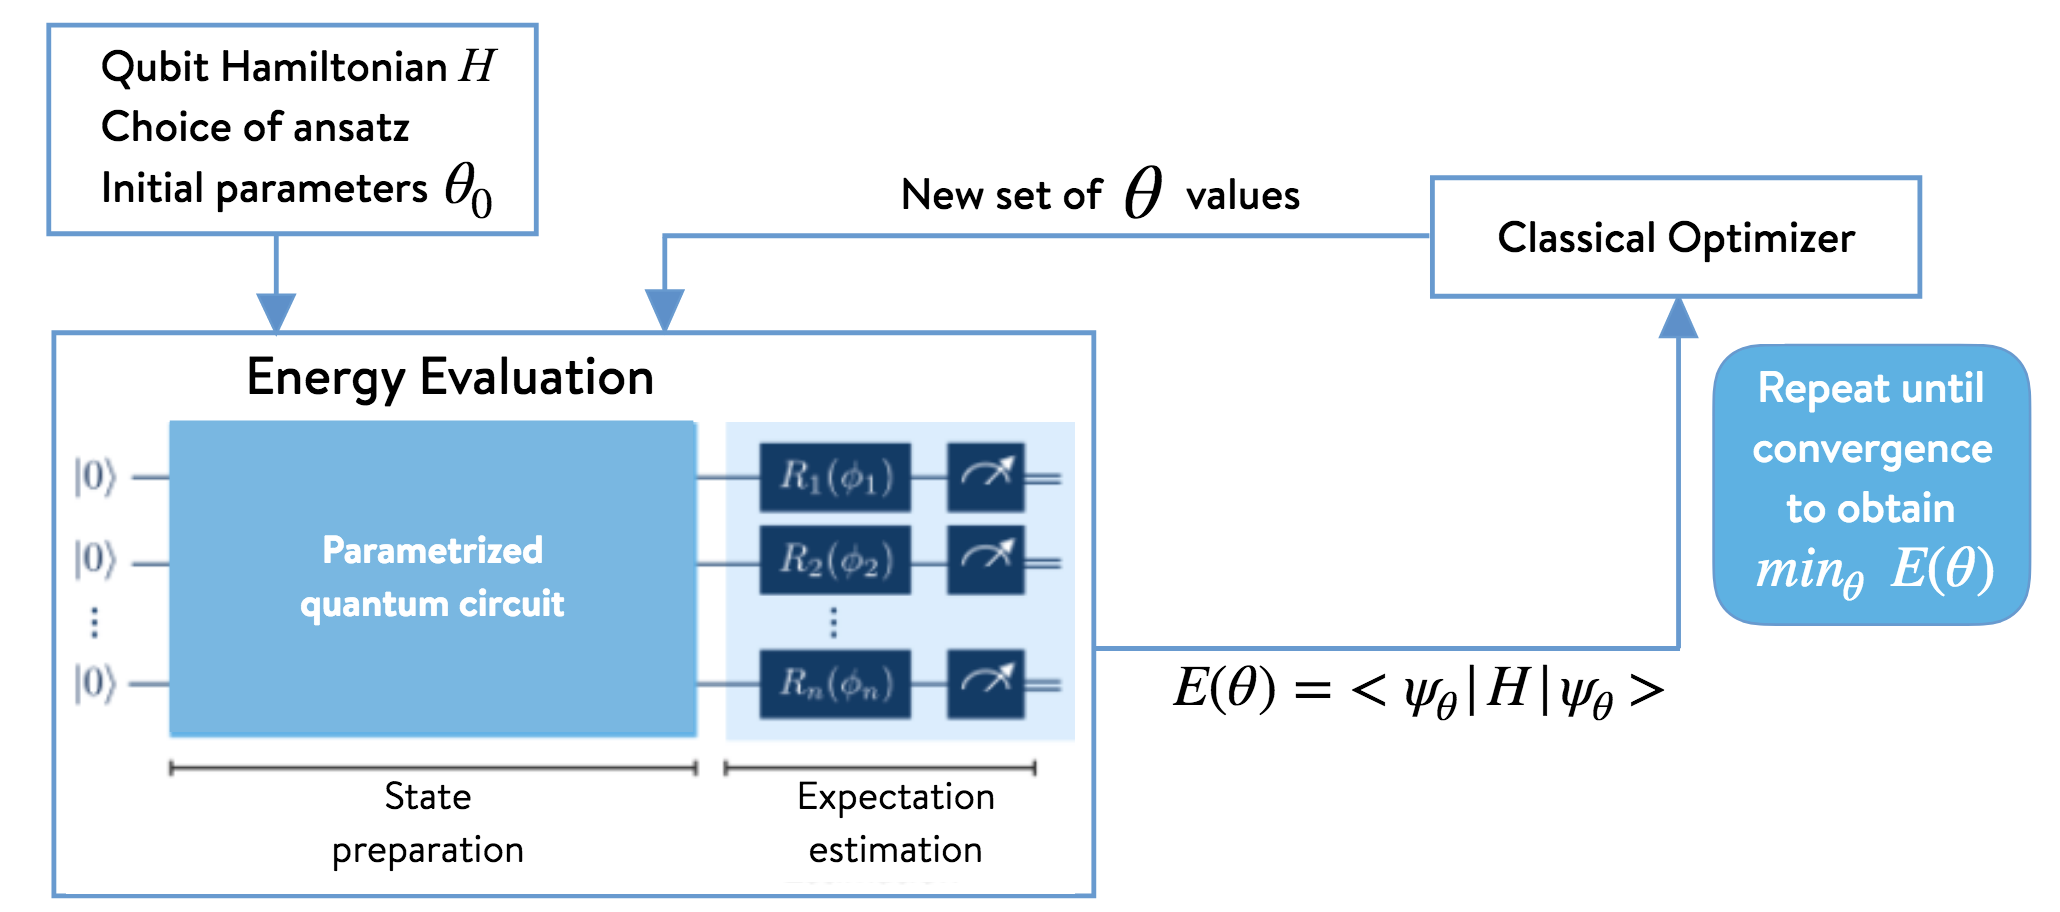

In [150]:
Image("./VQE_Diagram.png", width=600)

# Support Vector Regression to predict polarity of molecules

Write a python script that use a **support vector regression (SVR)** model to predict **TPSA** (**Topological polar surface area**, a physicochemical property describing the polarity of molecules) from molecules of the ZING Dataset contained in the file `'.Zn10.txt'`. The input - structural feature of molecules is Morgan fingerprint and the output is TPSA.

We recall that the **molecular fingerprint** represents the substructures of a molecule (array) as a vector of binary numbers. It is a molecular structure descriptor to use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

The workflow is

1. Get molecular fingerprints of each molecule
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

**The various necessaries libraries and modules will be import only where they are needed**.


In [151]:
import sklearn
print(sklearn.__version__)

1.2.2


In [152]:
import rdkit
print(rdkit.__version__)

2022.09.5


In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    

In [154]:
df = pd.DataFrame(data=smile, columns=['zinc_Smiles'])
df

zinc_Smiles
0             NC(=O)C1CCCCC1C(F)(F)F
1               CCCCCNC(=O)N1CCCC1CO
2            CCC(CC)c1cc(C[NH3+])on1
3         C[NH2+]C1CCC(c2ccccc2Cl)C1
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...                              ...
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997         CCCC[NH2+]C1CCc2ccccc21
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C
5999        CCC(C)NC(=O)NCCC(=O)[O-]

[6000 rows x 1 columns]

In [155]:
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem,QED, PandasTools, Descriptors

zinc_Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                              molecule  
0     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9fc30>  
1     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9e500>  
2     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9f680>  
3     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9f5a0>  
4     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9f920>  
...                                                ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7920>  
5996  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7990>  
5997  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7a00>  
5998  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7a70>  
5999  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7ae0>  

[6000 rows x 2 columns]
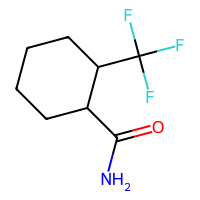
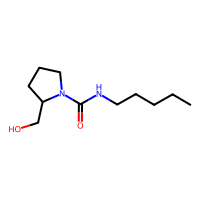
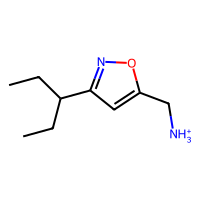
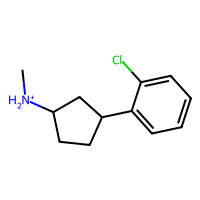
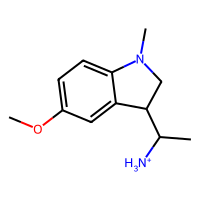
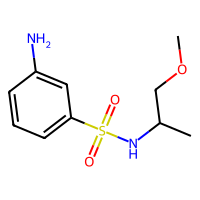
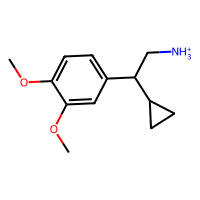
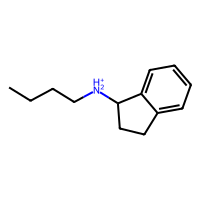
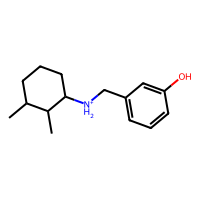
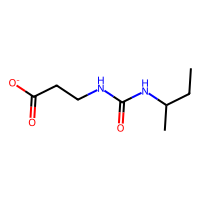

In [156]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='zinc_Smiles', molCol='molecule') 
df

In [157]:
df.isnull().sum()

zinc_Smiles    0
molecule       0
dtype: int64

In [158]:
def calculate_descriptors(mol):
    psa = Descriptors.TPSA(mol)
    return  psa

In [159]:
molecule = df.iloc[:, 1]

In [160]:
descriptors = [calculate_descriptors(mol) for mol in molecule]
descriptors_df = pd.DataFrame(descriptors, columns=[ 'PSA'])
data = pd.concat([df, descriptors_df], axis=1)
data

zinc_Smiles  \
0             NC(=O)C1CCCCC1C(F)(F)F   
1               CCCCCNC(=O)N1CCCC1CO   
2            CCC(CC)c1cc(C[NH3+])on1   
3         C[NH2+]C1CCC(c2ccccc2Cl)C1   
4     COc1ccc2c(c1)C(C(C)[NH3+])CN2C   
...                              ...   
5995    COCC(C)NS(=O)(=O)c1cccc(N)c1   
5996   COc1ccc(C(C[NH3+])C2CC2)cc1OC   
5997         CCCC[NH2+]C1CCc2ccccc21   
5998  CC1CCCC([NH2+]Cc2cccc(O)c2)C1C   
5999        CCC(C)NC(=O)NCCC(=O)[O-]   

                                              molecule    PSA  
0     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9fc30>  43.09  
1     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9e500>  52.57  
2     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9f680>  53.67  
3     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9f5a0>  16.61  
4     <rdkit.Chem.rdchem.Mol object at 0x7fb690c9f920>  40.11  
...                                                ...    ...  
5995  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7920>  81.42  
5996  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7990>  46.10  
5997  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7a00>  16.61  
5998  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7a70>  36.84  
5999  <rdkit.Chem.rdchem.Mol object at 0x7fb6a20e7ae0>  81.26  

[6000 rows x 3 columns]

In [161]:
data.isnull().sum()

zinc_Smiles    0
molecule       0
PSA            0
dtype: int64

In [162]:
fps= []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr) 
    fps.append(fp)

In [163]:
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [164]:
fps.shape

(6000, 1024)

In [165]:
PSA = data.iloc[:,2].values

In [166]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, PSA, train_size=0.8, random_state=seed)

In [167]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

PSA_predict = svr.predict(X_test)
r2 = r2_score(y_test, PSA_predict)
mse = mean_squared_error(y_test, PSA_predict)
print(f"The r2_score is:  {r2} and the mean square error is : {mse}")

In [ ]:
from scipy import stats

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, PSA_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, PSA_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted PSA ='+str(round(vect_norm,2))+'*True PSA +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True PSA')
plt.ylabel('Predicted PSA')
plt.legend()
plt.show()

# Calculer l'état fondamental de la molécule de phenylsulfonyl-carbazole (PSPCz)

Les calculateurs quantiques pourraient être des outils inestimables pour étudier la structure électronique et les propriétés dynamiques de molécules et de matériaux complexes, car il est plus logique de modéliser des systèmes de la physique quantique sur un dispositif quantique que sur un calculateur classique. Le phenylsulfonyl-carbazole (PSPCz) dont la formule moléculaire est $C_{18}H_{13}NO_2S$ et son SMILES isomérique est C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34, a des propriétés émettrices utiles de fluorescence retardée activée thermiquement (TADF) pour les applications de diodes électroluminescentes organiques (OLED). Son Hamiltonien en représentation de Pauli $\{\mathtt{I,\,X,\,Y,\,Z}\}$ est

$$ \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X} + \mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),$$

où les coefficients 
$$h_1 = -0.518418,\, h_2 = -0.136555,\, h_3 = -0.025866,\, h_4 = 0.015725,\, h_5 = -0.000296.$$

1. Utiliser `rdkit.Chem` pour représenter en 2D de molécule PSPCz à partir de son SMILES.

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
smi = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(smi) 
m

In [ ]:
m1 = AllChem.AddHs(m)
m1

2. Utiliser, pour calculer l'état fondamental de la molécule PSPCz,
   * `qiskit.opflow.operator_globals` et 
   * `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

In [ ]:
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms import NumPyMinimumEigensolver

In [ ]:
a=I^I
print(a)

In [ ]:
b=((Z^I)-(I^Z))
print(b)

In [ ]:
c=(Z^Z)
print(c)

In [ ]:
d=X^X
print(d)

In [ ]:
E=(X^I)+(I^X)+(X^Z)-(Z^X)
print(E)

In [ ]:
H = (-0.518418*a) -0.136555*b -0.025866*c+(0.015725*d)-0.000296*E
print(H)

In [ ]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

# VQE avec un Hardware Efficient Ansatz (HEA)

1. Utiliser  `qiskit.circuit.library.EfficientSU2` pour reproduire le Hardware Efficient Ansatz (HEA) suivant : 

In [ ]:
Image(filename='./SU2_Ansatz.png', width=400)

In [ ]:
from qiskit.circuit.library import EfficientSU2
SU2ansatz2 = EfficientSU2(4, su2_gates=['rx', 'y'], entanglement='circular', reps=1)
SU2ansatz2.decompose().draw('mpl')

2. Utiliser ce HEA (que l'on nommera `SU2ansatz`) dans l'algorithme VQE, définit ci-dessous par la fonction `algorithm(problem, mapper, optimizer)`, pour calculer l'état fondamental de la molécule $H_2$.

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.transformers import FreezeCoreTransformer

H2_driver = PySCFDriver(
    atom='H .0 .0 -0.3625; H .0 .0 0.3625',
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)
# Electronic structure problem
H2_problem = H2_driver.run()
transformer = FreezeCoreTransformer()
H2_problem = transformer.transform(H2_problem)

In [ ]:
from qiskit.algorithms.optimizers import SPSA, SLSQP, L_BFGS_B

In [ ]:
from qiskit.primitives import Estimator
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit_nature.second_q.algorithms import GroundStateEigensolver

import numpy as np

def algorithm(problem, mapper, optimizer):
    """ Setup VQE solver algorithm

    Args:
        problem : Electronic Structure Problem
        mapper : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver algorithm
    """    
    
    #ansatz
    ansatz = SU2ansatz # previously constructed
    
    #VQE algorithm solver
    vqe_solver = VQE(Estimator(), ansatz, optimizer)
    vqe_solver.initial_point = np.zeros(ansatz.num_parameters)
 
    # Ground state computation using a minimum eigensolver
    algorithm = GroundStateEigensolver(mapper, vqe_solver)
       
    # Compute Ground State properties.
    algorithm = algorithm.solve(problem)
    
    return algorithm

In [ ]:
from qiskit.algorithms.minimum_eigensolvers import VQE
import numpy as np

def vqe_solver(converter, optimizer):
    """ Setup VQE solver

    Args:
        converter : qubit mapper 
        optimizer : optimizer

    Returns: vqe solver
    """    
    vqe_solver = VQE(estimator,SU2ansatz2, optimizer)

   # vqe_solver.initial_point = np.zeros(ansatz(mapper).num_parameters)
    return vqe_solver

In [ ]:
from qiskit.primitives import Estimator

estimator = Estimator()

In [ ]:
from qiskit_nature.second_q.mappers import JordanWignerMapper,ParityMapper, QubitConverter
from qiskit_nature.second_q.mappers import TaperedQubitMapper
from qiskit.algorithms.optimizers import SLSQP
def run_vqe(problem, solver, mapper, optimizer = "SLSQP", show=True):
    """Computing of the molecular ground state with the `GroundStateEigensolver`
class 
    Args:
        problem :  Electronic structure problem

        mapper : Mapper string that can be "PM" or "JWM" or "BKM"
        
        optimizer :  Optimizer string that can be either "SPSA" or "SLSQP" or "L_BFGS_B"

        solver :  Sting that can be either "NumPy" or "VQE"
       
    Returns:
          The ground state of the molecule

    """    
    # Mapper
    dmap = {"JWM": JordanWignerMapper(), "PM": ParityMapper(),  "BKM": BravyiKitaevMapper()}
    for k, v in dmap.items():
        if k == mapper:        
            mapp = v   
            
    if solver == "VQE":             
        # Optimizer
        dopt = {"SPSA": SPSA(), "SLSQP": SLSQP(), "L_BFGS_B": L_BFGS_B()}
        for n, m in dopt.items():
            if n == optimizer:  
                opt = m
        GS_solver = vqe_solver(mapp, opt)

    # Solver
    if solver == "Numpy":
        GS_solver = NumPyMinimumEigensolver()

    # Ground state computation using a minimum eigensolver. Returns the solver.
    Algo = GroundStateEigensolver(mapp, GS_solver) 
    
    # Leveraging Qiskit Runtime
    start = time.time()
    
    # Compute Ground State properties.
    ground_state = Algo.solve(problem)
    elapsed = str(datetime.timedelta(seconds = time.time()- start))
    
    if show:
        print(f'Running {solver} and {mapper} mapper')
        if solver == "VQE":
            print(f'With {optimizer} optimizer and UCCSD ansatz')
        print(f'Elapsed time: {elapsed} \n')

        print(ground_state.total_energies[0])

    if solver == "VQE":
        return ground_state, elapsed, mapper, solver, optimizer
    else:
        return ground_state, elapsed, mapper, solver



In [ ]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
import time, datetime

res_vqe = run_vqe(H2_problem, mapper="PM", optimizer="SLSQP", solver="VQE")